### Linear Regression
In this notebook, you will implement your own linear regression model. 

In [1]:
# Import libraries 
# Scientific computation 
import numpy as np 
# Visualization 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use('ggplot')
# Unit tests 


### Create your dataset
Let's create our dataset based on **N = 10** datapoints of the simplest linear function: <br>
y = mx + b 

In [2]:
# Dataset (linear model)
# Features 
x = np.array(range(10)).reshape(-1, 1)
# Labels 
y = 2*x+3

### Define the hypothesis 
Remember the hypothesis is a linear combination of **n** features parameterized by **w** weights. Where **n** is equal to **w**. 
The task is to build two functions. One that initilizes the learning parameters **w**. And another that computes a linear combination using the features and the learning parameters. <br> <br>
** Exercise: ** Complete the function initialize_weights, your task is to return a tensor of the same size as features in order to compute the hypothesis. 

In [3]:
def initialize_weights(features):
    """ 
    Initialize the weights of the learning model
    :param features: tensor that contains the features of the model 
    : return: a tensor that contains random values with the same size of features
    """
    return np.random.rand(features.shape[1]+1, 1)



** Exercise: ** Complete the function compute_hypothesis, your task is to return a tensor that contains a linear combination of features and learning parameters.

In [4]:
def compute_hypothesis(features, weights):
    """
    Compute the linear combination of the hypothesis
    :param features: tensor that contains the features of the model
    :param weights: tensor that contains the random-initialized 
                    learning parameters of the model
    : return: a tensor that matrix multiplies the features and the weights
    """
    return np.dot(features, weights)

### Cost function
The next step is to program the cost function of the model. Remember that we are working on linear regression, so we are going to use the popular **mean squared error (MSE)** <br> <br>

**Exercise: ** Complete the function cost_function, for this you will make use of the functions you implemented before. 

In [5]:
def cost_function(hypothesis, labels, derivative = False):
    """
    Compute the cost function of a linear regression model 
    :param hypothesis: tensor that contains the linear combination of
                        features and learning parameters
    :param labels: tensor that contains the labels of the dataset
    :param derivative: boolean that controls the output of the derivative of the 
                        cost function
    : return: a value that represents the associated cost for the current hypothesis
            and labels
    """
    m = labels.shape[0]
    mse_loss = (1 / (2*m)) * np.sum( (hypothesis - labels)**2 )
    if derivative:
        deriv = (1 / m) * np.sum( np.dot((hypothesis - labels).T, x) )
        return mse_loss, deriv
    else:
        return mse_loss


### Learning algorithm 
The final step is to program the learning algorithm to minimize the cost function and so find the minium point in the **cost function vs learning parameters** function. <br>
The algorithm that we are going to implement is going to be the batch gradient descent (BGD). <br>

**Exercise: ** Tune the hyperparameters for BGD

In [6]:
# Hyperparameters 
epochs = 20
learning_rate = 0.005

**Exercise: ** Complete the steps in the implemantation of BGD. 

In [7]:
# Support variables 
cost_history = []

# Initialize the learning parameters 
weights = initialize_weights(x)
print('weights initialized: {}'.format(weights))

x = np.concatenate((x, np.ones([x.shape[0],1])), axis=1)

# Compute the algorithm "epochs" times
for e in range(epochs):
    # Some feedback
    print('\n*Iteration number {}'.format(e))
    
    # Hypothesis
    hypothesis = compute_hypothesis(x, weights)
    #print( 'Hypothesis: {}'.format(hypothesis) )
    
    # Cost function
    cost, deriv = cost_function(hypothesis, y, derivative = True)
    cost_history.append(cost)
    print( 'Cost funtion: {}'.format(cost) )
    
    # Update weights
    weights = weights - learning_rate * deriv
    #print('Updated weights: {}'.format(weights))

weights initialized: [[ 0.44824556]
 [ 0.80346237]]

*Iteration number 0
Cost funtion: 52.06375137254773

*Iteration number 1
Cost funtion: 33.96399333812936

*Iteration number 2
Cost funtion: 22.161932988299146

*Iteration number 3
Cost funtion: 14.466325774315173

*Iteration number 4
Cost funtion: 9.44835699289184

*Iteration number 5
Cost funtion: 6.176359086659868

*Iteration number 6
Cost funtion: 4.042832401914398

*Iteration number 7
Cost funtion: 2.6516529925843324

*Iteration number 8
Cost funtion: 1.7445257638593579

*Iteration number 9
Cost funtion: 1.1530277848240573

*Iteration number 10
Cost funtion: 0.7673378307317218

*Iteration number 11
Cost funtion: 0.5158462856036014

*Iteration number 12
Cost funtion: 0.35185965178065265

*Iteration number 13
Cost funtion: 0.2449311422799374

*Iteration number 14
Cost funtion: 0.1752077393568112

*Iteration number 15
Cost funtion: 0.12974415870951894

*Iteration number 16
Cost funtion: 0.10009934680107334

*Iteration number 17
Cost

### Visualization of the cost function
In order to convince ourselves that the algorithm is working and we have set the correct hyperparameters, we will plot the **cost function vs the number of epochs**.

** If you see that the cost function is decreasing over time, then the algorithm is working fine **

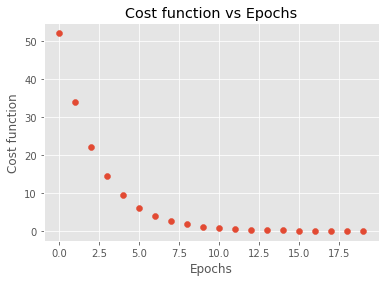

In [8]:
# Let's visualize the learning curve 
plt.scatter([i for i in range(epochs)], cost_history)
plt.title('Cost function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()

### Visualization of the result
Finally, let's visualize the **machine learning model vs original data distribution**

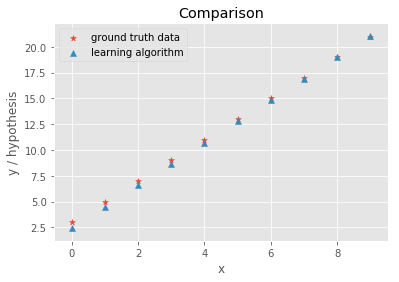

In [9]:
plt.scatter(x[:,0], y, label='ground truth data', marker='*')
plt.scatter(x[:,0], np.dot(x, weights), label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()

In [10]:
weights = np.dot(np.linalg.pinv(x),y)

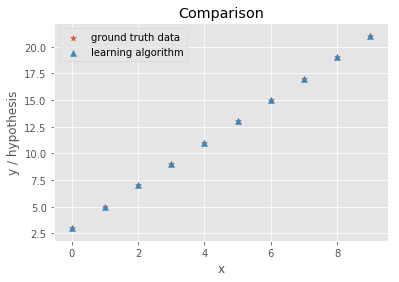

In [11]:
plt.scatter(x[:,0], y, label='ground truth data', marker='*')
plt.scatter(x[:,0], np.dot(x, weights), label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()

In [12]:
weights = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T),y)

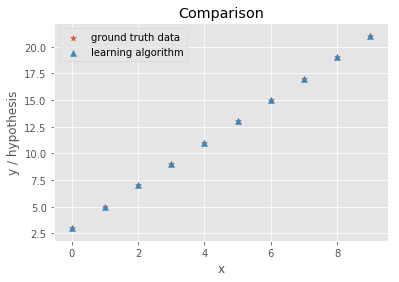

In [13]:
plt.scatter(x[:,0], y, label='ground truth data', marker='*')
plt.scatter(x[:,0], np.dot(x, weights), label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()